In [3]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [7]:
# Function to create and plot KDE for a given feature
def generate_kde_plot(data, feature, compliance_column, compliance_threshold, title, unit, save_path=None):
    """
    Generate and plot KDE curves for a given feature split by compliance.

    Parameters:
    - data (DataFrame): The dataset.
    - feature (str): The feature/column to analyze.
    - compliance_column (str): Column representing compliance (e.g., response time).
    - compliance_threshold (float): Threshold to split compliant and non-compliant groups.
    - title (str): Custom title for the plot, describing the feature.
    - unit (str): Unit of measurement for the feature (e.g., "miles").
    - save_path (str, optional): Path to save the plot. If None, the plot is not saved.

    Returns:
    - None
    """
    # Split the data into compliant and non-compliant groups
    compliant_data = data[data[compliance_column] <= compliance_threshold][feature]
    non_compliant_data = data[data[compliance_column] > compliance_threshold][feature]

    # Generate KDE for compliant data
    kde_compliant = gaussian_kde(compliant_data)
    x_compliant = np.linspace(compliant_data.min(), compliant_data.max(), 200)
    density_compliant = kde_compliant(x_compliant)

    # Generate KDE for non-compliant data
    kde_non_compliant = gaussian_kde(non_compliant_data)
    x_non_compliant = np.linspace(non_compliant_data.min(), non_compliant_data.max(), 200)
    density_non_compliant = kde_non_compliant(x_non_compliant)

    # Plot the KDE
    plt.figure(figsize=(8, 6))
    plt.plot(x_compliant, density_compliant, label=f"{title} - Compliant", color="#F0A952", linewidth=2)
    plt.plot(x_non_compliant, density_non_compliant, label=f"{title} - Non-Compliant", color="#C72A1C", linewidth=2)
    plt.title(f"KDE Plot for {title} by Compliance", fontsize=16)
    plt.xlabel(f"{title} ({unit})", fontsize=14)  # Custom x-axis label with units
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.text(0.95, 0.01, f"Units: {unit}", fontsize=10, color='gray', ha='right', transform=plt.gca().transAxes)  # Units note
    plt.grid(False)

    # Save or show the plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

Plot saved to kde_mean_distance_to_call.png


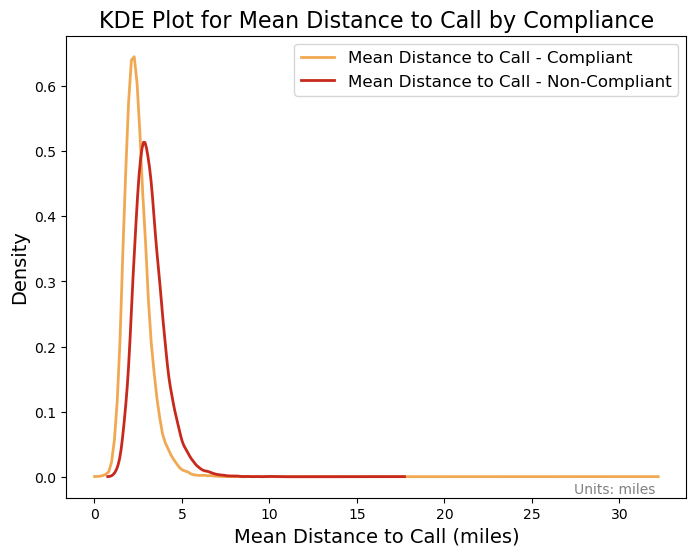

In [8]:
# dist_mean
data = pd.read_csv('../data/cleaned_data.csv')
feature = "dist_mean"  # Column name in the dataset
compliance_column = "percentile_90_response_emergent"  # Column representing compliance
compliance_threshold = 540  # Compliance threshold (seconds)
title = "Mean Distance to Call"  # Custom feature name for the plot
unit = "miles"  # Unit of measurement for the feature

# Generate and display the KDE plot
generate_kde_plot(data, feature, compliance_column, compliance_threshold, title, unit, save_path="kde_mean_distance_to_call.png")